In [2]:
import numpy as np
import random
import math
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

### Class for k-Arm Bandit RL problem

In [25]:
class KArmBandit:
    '''
    This class defines the k arm bandit RL problem    
    '''
    def __init__(self, k,armVar = 1,plotAction = False):
        #Number of Arm
        self.k = k
        '''
        Distribution of each arm selected from a normal distribution of mean +4
        '''
        self.armDist = np.random.randn(k) + 4
        self.armVar = armVar
        self.bstArmVal = np.max(self.armDist)
        self.bstArm = np.argmax(self.armDist)
        if plotAction:
            self.plotActionDistribution()
        #Numerical Prefenrece for each arm
        self.h = self.initializeArm()
        self.baseline = 0
        self.pie = self.softMax()
    
    def initializeArm(self):
        '''
        To initialize the estimate of  action-values 
        '''
        return np.zeros(self.k)
    
    def plotActionDistribution(self):
        '''
        Generete the plot for violen plot if the arm distribution
        '''
        var = np.ones((1,self.k))
        data = np.random.randn(2000, self.k) * var + self.armDist
        plt.figure(figsize=(10,6))
        plt.violinplot(data,showmeans = True,showextrema=True)
        plt.xlabel('Action')
        plt.ylabel('Reward distribution')
        plt.grid(True)
        plt.show()
    
    def softMax(self):
        return np.exp(self.h) / np.sum(np.exp(self.h))
        
    def updateH(self,arm,t,alpha,includebaseline = True):
        '''
        Incremental update action preference of each arm
        '''
        rt = np.random.normal(loc = self.armDist[arm],scale = self.armVar)
        # sample Average mean for the return receive so far
        self.baseline = self.baseline + (1/t)* (rt - self.baseline)
        if includebaseline:
            delta = -1 * alpha * (rt - self.baseline) * self.pie
            delta[arm] = alpha * (rt - self.baseline) * (1 - self.pie[arm])
        else:
            delta = -1 * alpha * rt * self.pie
            delta[arm] = alpha * rt * (1 - self.pie[arm])
        self.h += delta
    
    def selectArm(self):
        '''
        Select a arm 
        '''
        self.pie = self.softMax()
        selectedArm = np.random.choice(np.arange(10),p= self.pie)
        return selectedArm
        

### Performing Experiment

In [20]:
# initializing the dictionary
k= 10
pctOptimalAction = dict()

In [26]:
aplhas = [0.1,0.4]
for alpha in aplhas:
    pctOptActTimeStep = np.zeros(1000);
    #Run 2K individual bandit problem
    for i in tqdm(range(1,2001)):
        karmBandit = KArmBandit(k, 1 , False)
        # run 1000 time step of rach problem 
        for j in range(0,1000):
            arm = karmBandit.selectArm()
            reward = karmBandit.updateH(arm,j+1,alpha,includebaseline = True)
            if arm == karmBandit.bstArm:
                pctOptActTimeStep[j] += 1
    #calculating the percentage
    pctOptActTimeStep = (pctOptActTimeStep/i) *100 
    #filling dict of data
    pctOptimalAction[alpha+1] = pctOptActTimeStep

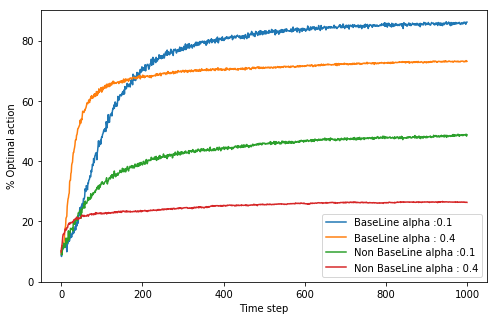

In [27]:
# plot for % Optimal Action
plt.figure(figsize=(8,5))
plt.plot(pctOptimalAction[0.1], label='BaseLine alpha :0.1')
plt.plot(pctOptimalAction[0.4],label='BaseLine alpha : 0.4')
plt.plot(pctOptimalAction[1.1], label='Non BaseLine alpha :0.1')
plt.plot(pctOptimalAction[1.4],label='Non BaseLine alpha : 0.4')
plt.xlabel('Time step')
plt.ylabel('% Optimal action')
plt.yticks(np.arange(0, 100, step=20))
plt.legend()
plt.show()